*******************************************


Background:

The data consist of the estimation of obesity levels in people from the countries of Mexico, Peru and Colombia, with ages between 14 and 61 and diverse eating habits and physical condition , data was collected using a web platform with a survey where anonymous users answered each question, then the information was processed obtaining 17 attributes and 2111 records. The prediction process will involve predicting the weight category based on the other input attributes

*******************************************

Attributes related to eating habits:

Frequent consumption of high caloric food (FAVC)
Frequency of consumption of vegetables (FCVC)
Number of main meals (NCP) 
Consumption of food between meals (CAEC) 
Consumption of water daily (CH20) 
Consumption of alcohol (CALC) 

*******************************************

Attributes related to physical condition:

Calories consumption monitoring (SCC) 
Physical activity frequency (FAF) 
Time using technology devices (TUE) 
Transportation used (MTRANS)

 # PART 1 Exploratory Data Analysis (EDA)

In [221]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis
from sklearn import preprocessing 




In [222]:
# reading the training file and looking at the forst 5 rows

train = pd.read_csv('train.csv')
train.head()

id  Gender        Age    Height      Weight family_history_with_overweight  \
0   0    Male  24.443011  1.699998   81.669950                            yes   
1   1  Female  18.000000  1.560000   57.000000                            yes   
2   2  Female  18.000000  1.711460   50.165754                            yes   
3   3  Female  20.952737  1.710730  131.274851                            yes   
4   4    Male  31.641081  1.914186   93.798055                            yes   

  FAVC      FCVC       NCP        CAEC SMOKE      CH2O SCC       FAF  \
0  yes  2.000000  2.983297   Sometimes    no  2.763573  no  0.000000   
1  yes  2.000000  3.000000  Frequently    no  2.000000  no  1.000000   
2  yes  1.880534  1.411685   Sometimes    no  1.910378  no  0.866045   
3  yes  3.000000  3.000000   Sometimes    no  1.674061  no  1.467863   
4  yes  2.679664  1.971472   Sometimes    no  1.979848  no  1.967973   

        TUE       CALC                 MTRANS           NObeyesdad  
0  0.976473  Sometimes  Public_Transportation  Overweight_Level_II  
1  1.000000         no             Automobile        Normal_Weight  
2  1.673584         no  Public_Transportation  Insufficient_Weight  
3  0.780199  Sometimes  Public_Transportation     Obesity_Type_III  
4  0.931721  Sometimes  Public_Transportation  Overweight_Level_II

In [223]:
# reading the testing file and looking at the forst 5 rows


test = pd.read_csv('test.csv')
test.head()

id  Gender        Age    Height      Weight  \
0  20758    Male  26.899886  1.848294  120.644178   
1  20759  Female  21.000000  1.600000   66.000000   
2  20760  Female  26.000000  1.643355  111.600553   
3  20761    Male  20.979254  1.553127  103.669116   
4  20762  Female  26.000000  1.627396  104.835346   

  family_history_with_overweight FAVC      FCVC       NCP       CAEC SMOKE  \
0                            yes  yes  2.938616  3.000000  Sometimes    no   
1                            yes  yes  2.000000  1.000000  Sometimes    no   
2                            yes  yes  3.000000  3.000000  Sometimes    no   
3                            yes  yes  2.000000  2.977909  Sometimes    no   
4                            yes  yes  3.000000  3.000000  Sometimes    no   

       CH2O SCC       FAF       TUE       CALC                 MTRANS  
0  2.825629  no  0.855400  0.000000  Sometimes  Public_Transportation  
1  3.000000  no  1.000000  0.000000  Sometimes  Public_Transportation  
2  2.621877  no  0.000000  0.250502  Sometimes  Public_Transportation  
3  2.786417  no  0.094851  0.000000  Sometimes  Public_Transportation  
4  2.653531  no  0.000000  0.741069  Sometimes  Public_Transportation

In [224]:
# number of rows and columns in training data

train.shape

(20758, 18)

In [225]:
# number of rows and columns in testing data


test.shape

(13840, 17)

In [226]:
# lloking at the columns, their data types and number of non-null values in each column

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  object 
 6   FAVC                            20758 non-null  object 
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  object 
 11  CH2O                            20758 non-null  float64
 12  SCC                             

In [227]:
# looking at the mean, standard deviation and other metrics of all the numerical columns

train.describe()

id           Age        Height        Weight          FCVC  \
count  20758.00000  20758.000000  20758.000000  20758.000000  20758.000000   
mean   10378.50000     23.841804      1.700245     87.887768      2.445908   
std     5992.46278      5.688072      0.087312     26.379443      0.533218   
min        0.00000     14.000000      1.450000     39.000000      1.000000   
25%     5189.25000     20.000000      1.631856     66.000000      2.000000   
50%    10378.50000     22.815416      1.700000     84.064875      2.393837   
75%    15567.75000     26.000000      1.762887    111.600553      3.000000   
max    20757.00000     61.000000      1.975663    165.057269      3.000000   

                NCP          CH2O           FAF           TUE  
count  20758.000000  20758.000000  20758.000000  20758.000000  
mean       2.761332      2.029418      0.981747      0.616756  
std        0.705375      0.608467      0.838302      0.602113  
min        1.000000      1.000000      0.000000      0.000000  
25%        3.000000      1.792022      0.008013      0.000000  
50%        3.000000      2.000000      1.000000      0.573887  
75%        3.000000      2.549617      1.587406      1.000000  
max        4.000000      3.000000      3.000000      2.000000

In [228]:
# value counts for the column Means of Transportation

train['MTRANS'].value_counts()

MTRANS
Public_Transportation    16687
Automobile                3534
Walking                    467
Motorbike                   38
Bike                        32
Name: count, dtype: int64

In [229]:
# number of unique values in each column of the dataset

train.nunique()

id                                20758
Gender                                2
Age                                1703
Height                             1833
Weight                             1979
family_history_with_overweight        2
FAVC                                  2
FCVC                                934
NCP                                 689
CAEC                                  4
SMOKE                                 2
CH2O                               1506
SCC                                   2
FAF                                1360
TUE                                1297
CALC                                  3
MTRANS                                5
NObeyesdad                            7
dtype: int64

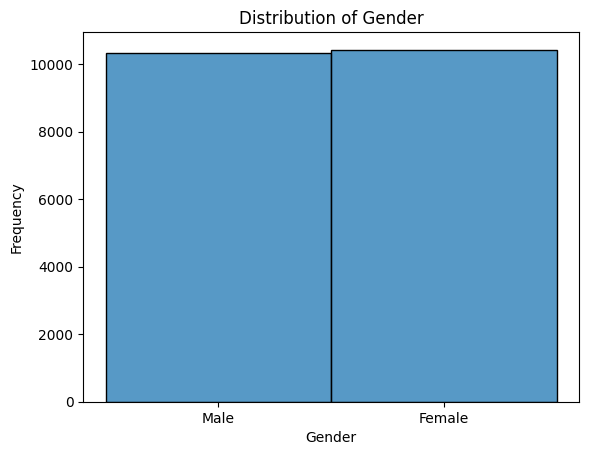

In [230]:
# histogram plot for Gender

sns.histplot(train['Gender'], kde=False)
plt.title("Distribution of Gender")
plt.xlabel("Gender")
plt.ylabel("Frequency")
plt.show()

The histogram above shows that there is pretty much an equal representation of men and women in the dataset

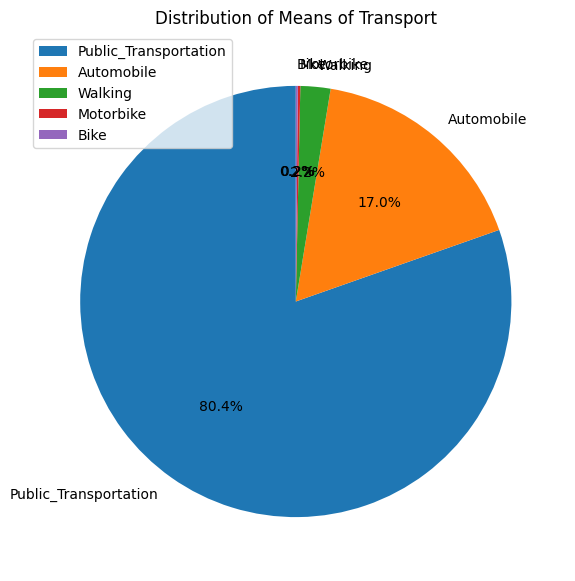

In [231]:
category_counts = train['MTRANS'].value_counts()
plt.figure(figsize=(7, 7))
category_counts.plot.pie(autopct='%1.1f%%', startangle=90, legend=True)
plt.title('Distribution of Means of Transport')
plt.ylabel('')
plt.show()

The pie plot above shows that the public relies heavily on public transportation as their primary meanns of transport followed by use of automobiles.

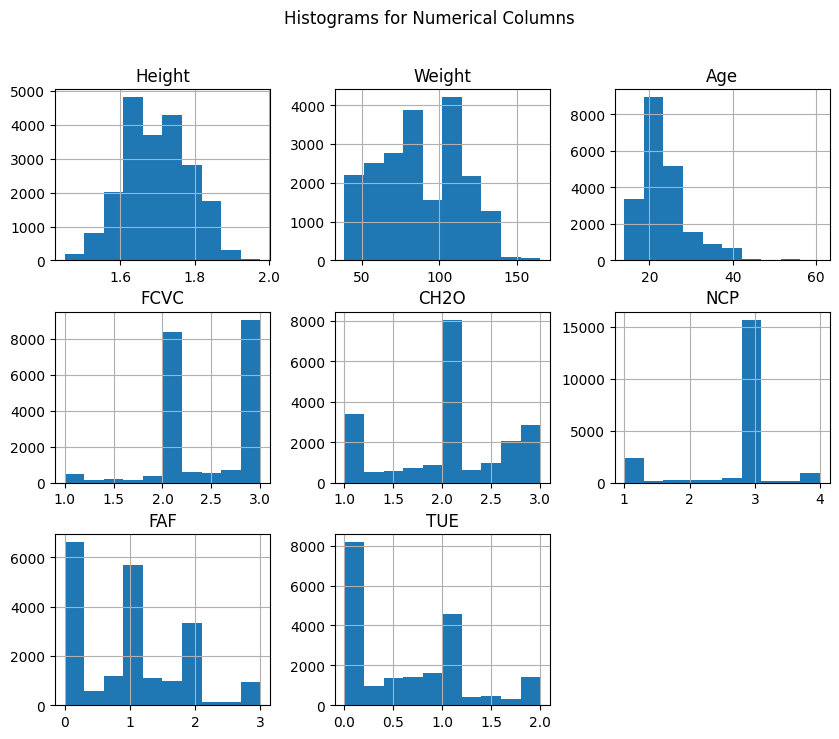

In [232]:
# histograms for each numerical column

numerical_cols=train[['Height','Weight','Age','FCVC','CH2O','NCP','FAF','TUE']]
numerical_cols.hist(figsize=(10, 8))
plt.suptitle('Histograms for Numerical Columns')
plt.show()

The histograms show a normal distribution for the column Height. The column Age also shows a normal distribution like patterm. There doesn't seem to be any specific pattern in most of the other columns.

<Axes: xlabel='NObeyesdad', ylabel='Frequency'>

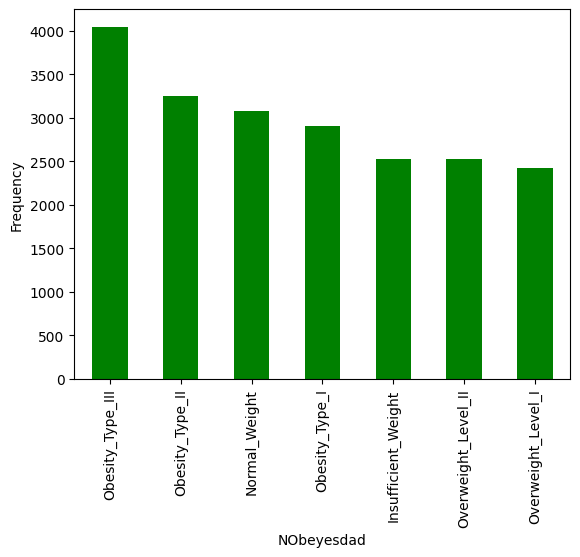

In [233]:
# bar plot for the different weight catgories. These weight categories are the target variable.

train['NObeyesdad'].value_counts().plot(kind='bar',color='green',ylabel='Frequency')

The bar plot of the different weight categories above show a relatively equal distribution of the categories. There doesnt seem to be a need of resampling or increasing the represenation of any weight category.

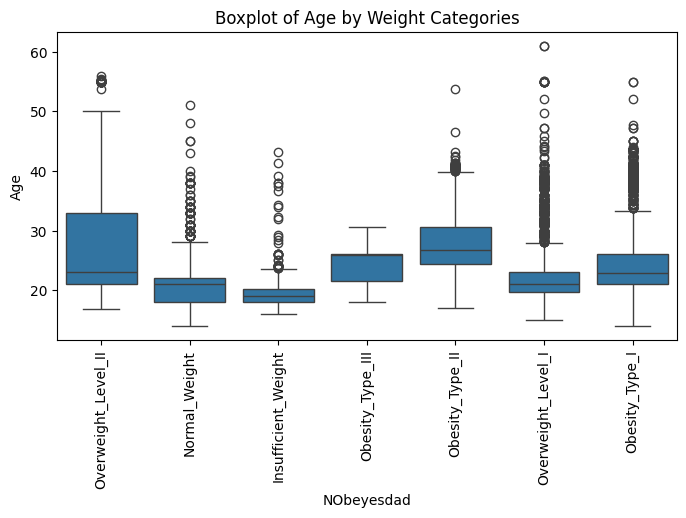

In [234]:
# box plot for age by different weight categories
plt.figure(figsize=(8, 4))
sns.boxplot(x=train['NObeyesdad'], y=train['Age'])
plt.title(f'Boxplot of Age by Weight Categories')
plt.xticks(rotation='vertical')
plt.show()

The box plot above shows that for most weight categories, the median falls in the range 20-30. This shows that obesity is an alarming trend for young adults

<Axes: xlabel='Gender', ylabel='Height'>

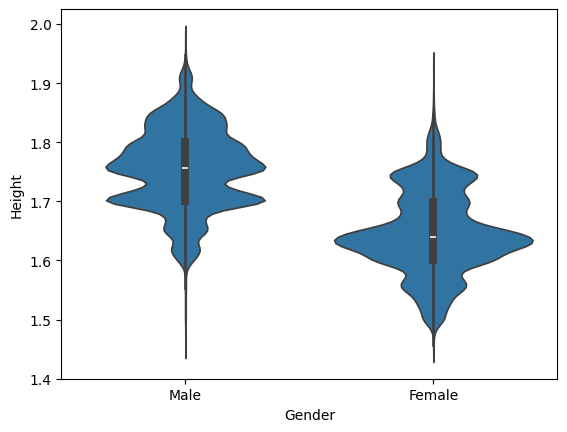

In [235]:
# violin plot for Gender vs weight

sns.violinplot(x='Gender', y='Height', data=train)

This distribution aligns with typical human height patterns, where males tend to be taller than females on average, with about a 10 cm difference in median heights. The overlapping distributions also show that while there are clear differences between genders, there's also considerable overlap in height ranges.

<Axes: xlabel='Gender', ylabel='Weight'>

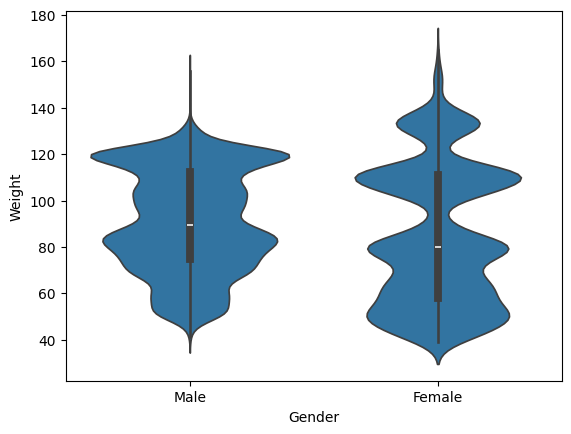

In [236]:
# violin plot for weight across the genders

sns.violinplot(x='Gender', y='Weight', data=train)

In the violin plot above,female distribution shows more distinct modes/peaks compared to males.
Males: approximately 40-160 kg
Females: approximately 35-165 kg
Both genders show some extreme values at both ends.

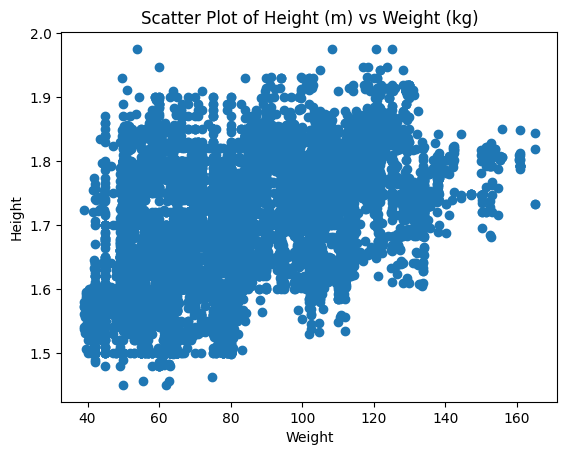

In [237]:
# scatter plot for height vs weight

plt.scatter(train['Weight'], train['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')
plt.title('Scatter Plot of Height (m) vs Weight (kg)')
plt.show()

The scatter plot shows a trend between height and weight. People who are taller also tend to have a higher weight. Its not a completely trend but has a polynimial component to it.

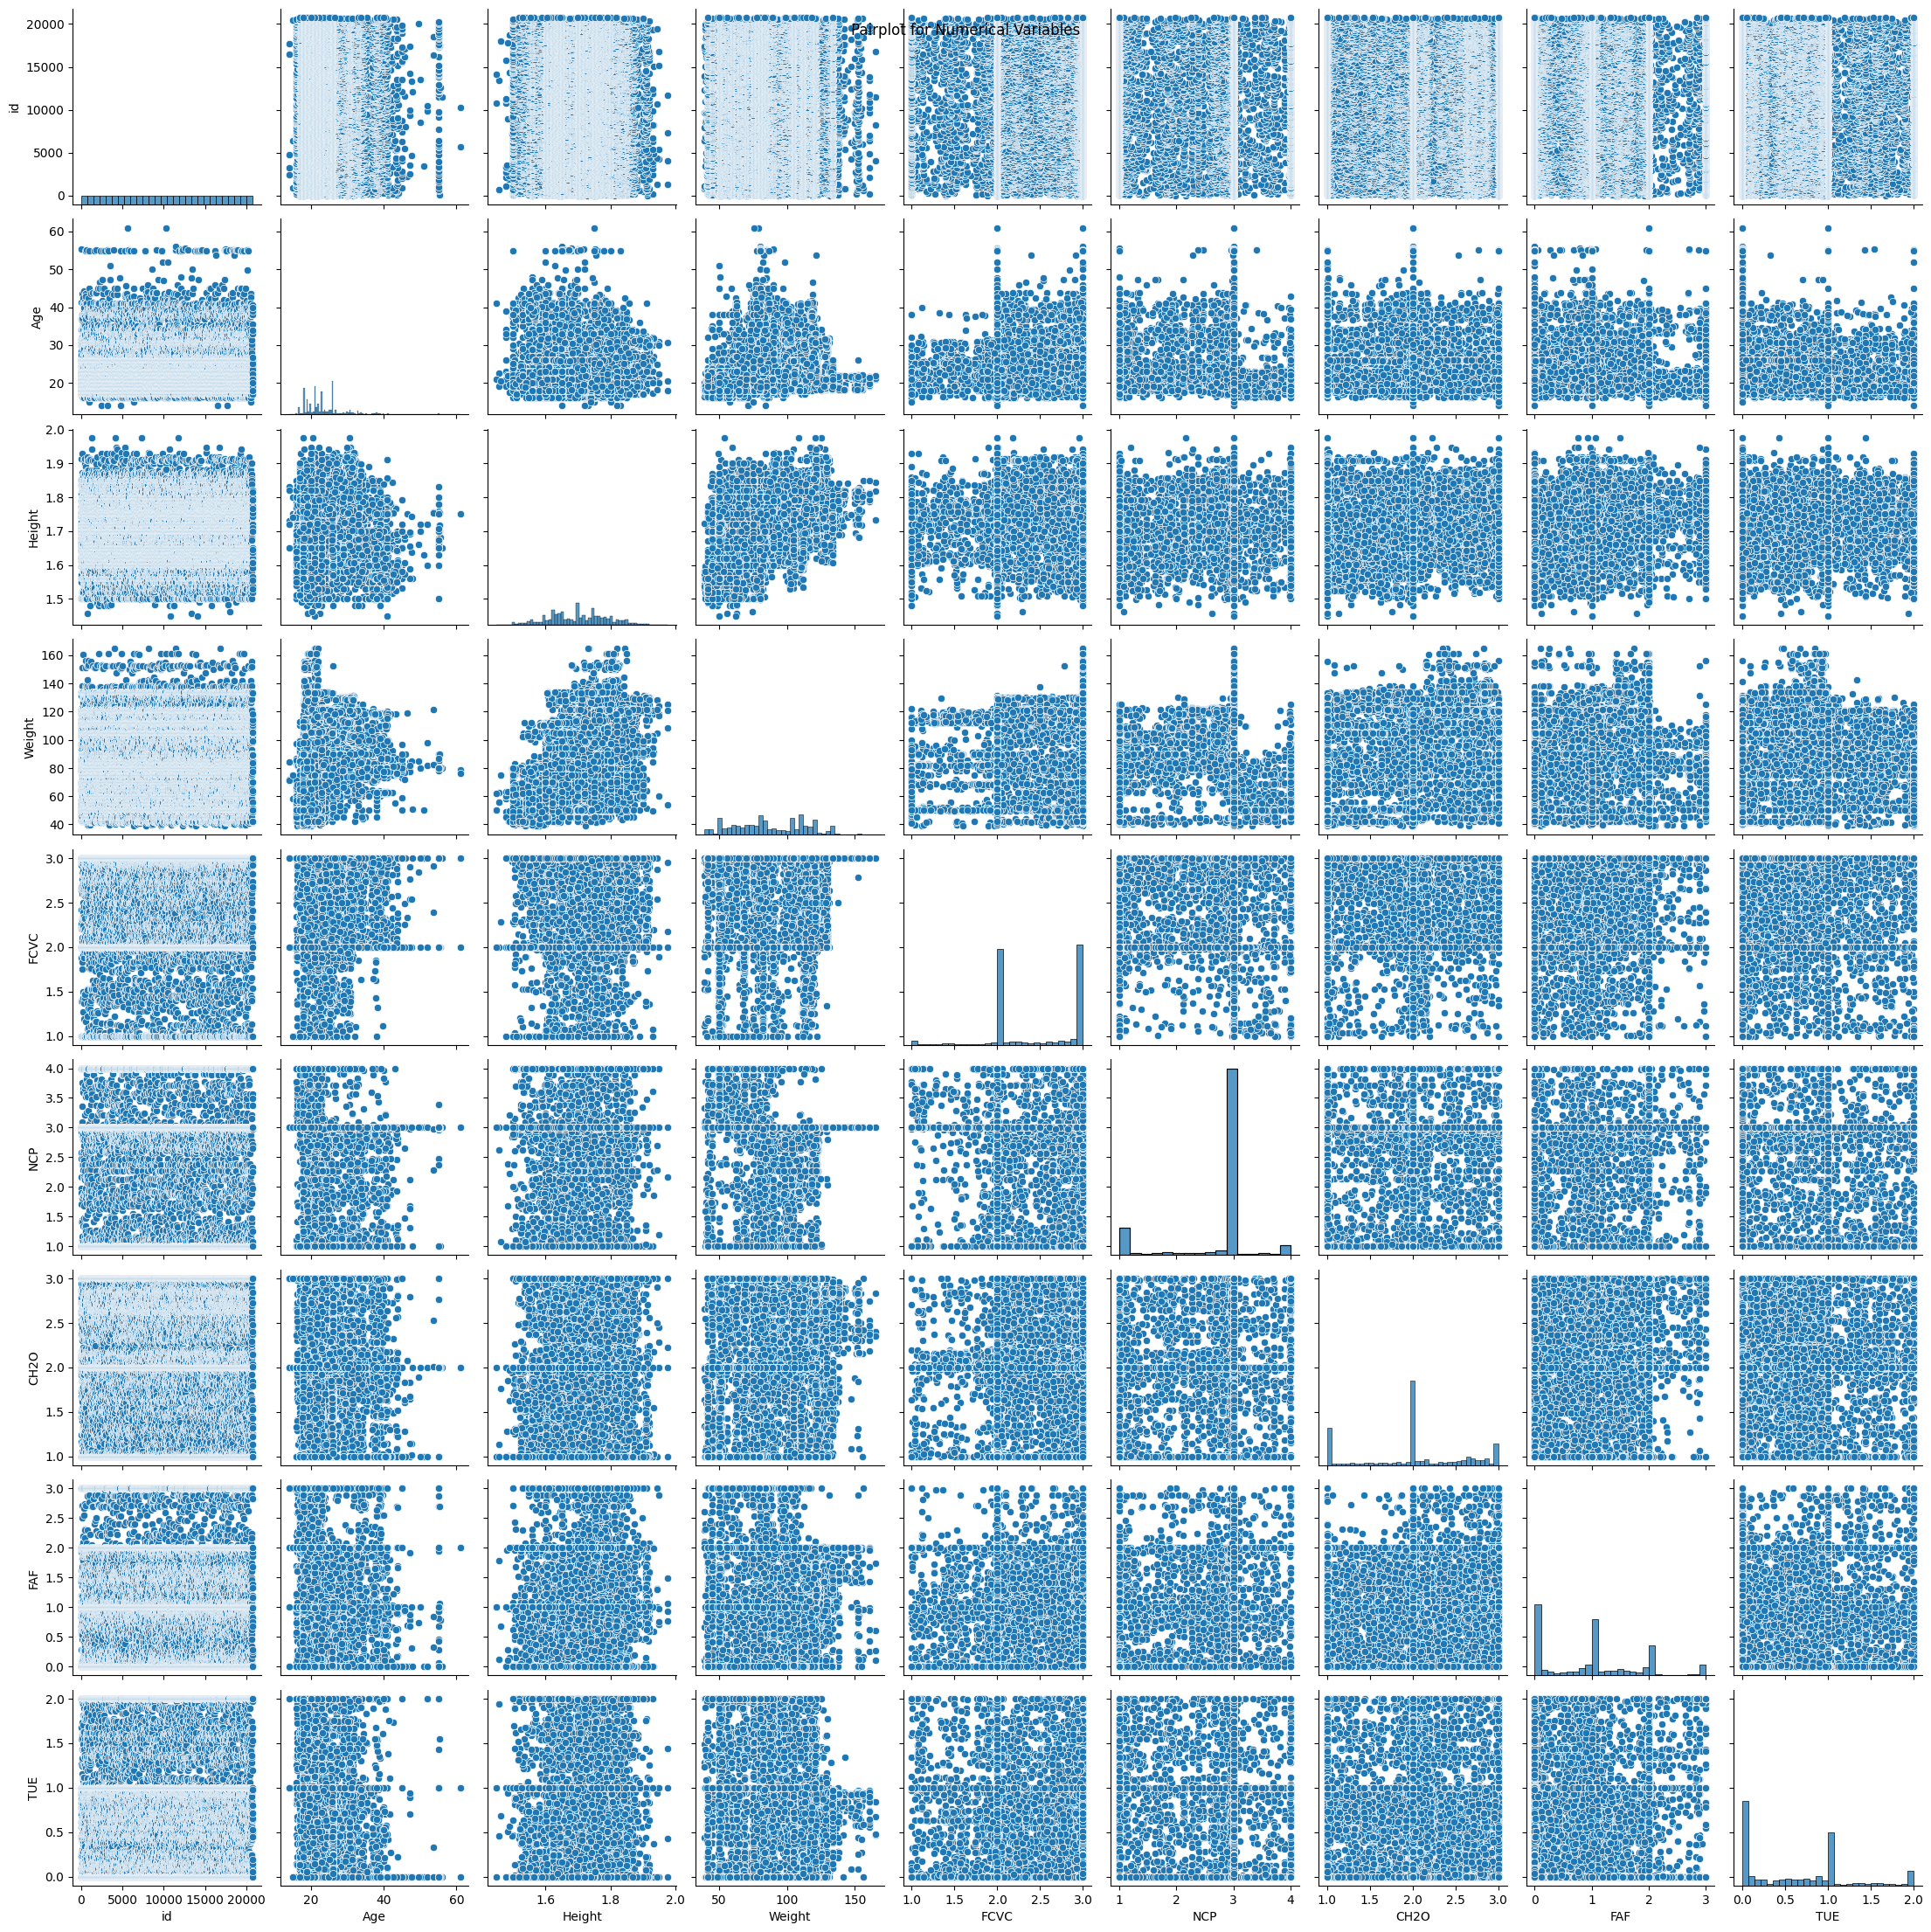

In [238]:
# pair plot for each pair of categorical variable

sns.pairplot(train)
plt.suptitle('Pairplot for Numerical Variables')
plt.show()

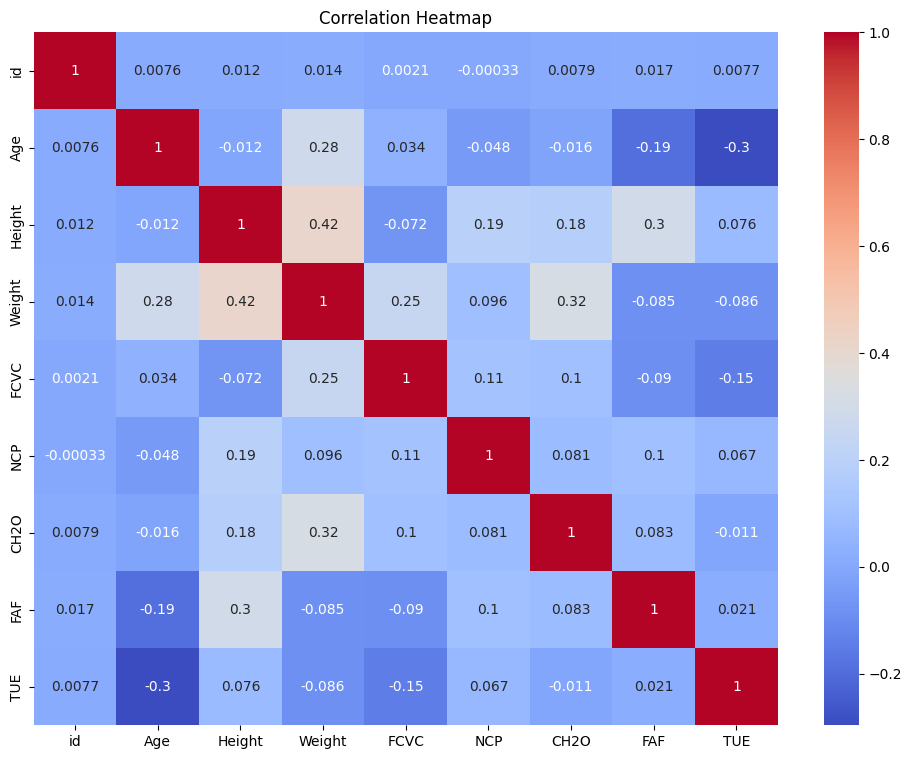

In [239]:
# correlation heatmap for the dataset

plt.figure(figsize=(12, 9))
sns.heatmap(train.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

The correlation heatmap shows that the columns of Age, Weight, family history and BMI have a high correlation with the taget variable. The consumption of H2O also seems to be a deciding factor in the obesity prediction process.

# PART 2: Data Cleaning

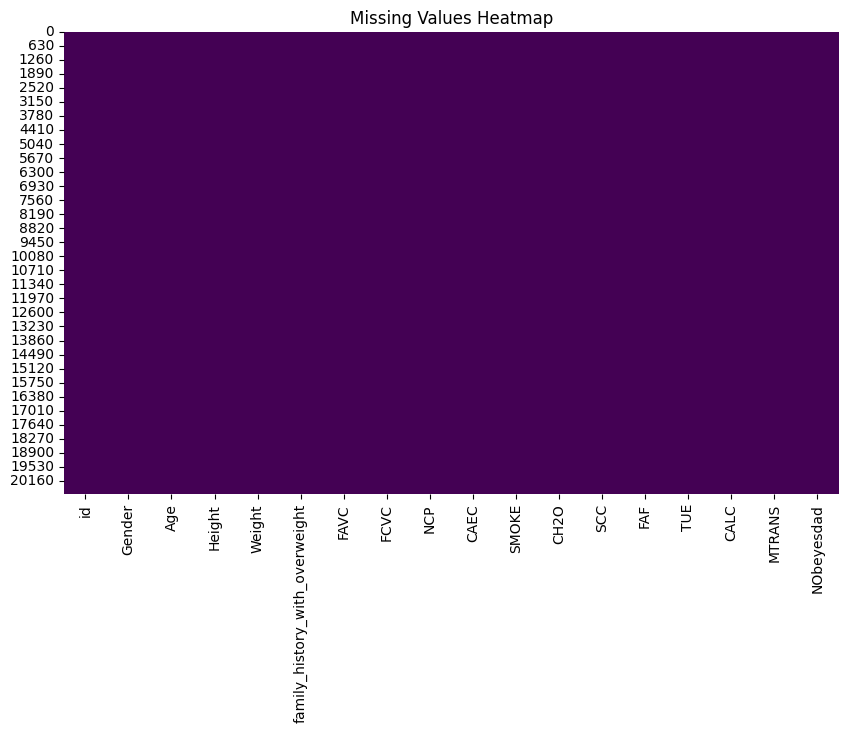

In [240]:
# printing the missing values heatmap for the dataset

plt.figure(figsize=(10, 6))
sns.heatmap(train.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()


The heatmap shows that there are no missing values in the dataset

In [241]:
# looking for outliers in the dataset using the IQR method

Q1 = train.select_dtypes(include=['float64', 'int64']).quantile(0.25)
Q3 = train.select_dtypes(include=['float64', 'int64']).quantile(0.75)
IQR = Q3 - Q1
numerical_df = train.select_dtypes(include=['float64', 'int64'])
outliers = ((numerical_df < (Q1 - 1.5 * IQR)) | (numerical_df > (Q3 + 1.5 * IQR))).sum()
print(f"Outliers detected based on IQR method:\n{outliers}")

Outliers detected based on IQR method:
id           0
Age       1074
Height       4
Weight       0
FCVC         0
NCP       6052
CH2O         0
FAF          0
TUE          0
dtype: int64


Outliers have been detected in the column of Age and NCP.

In [242]:
# removing outliers from the Age column using the interquartile range method

Q1 = train['Age'].quantile(0.25)
Q3 = train['Age'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

# Create arrays of Boolean values indicating the outlier rows
upper_array = np.where(train['Age'] >= upper)[0]
lower_array = np.where(train['Age'] <= lower)[0]

# Removing the outliers
train.drop(index=upper_array, inplace=True)
train.drop(index=lower_array, inplace=True)

In [243]:
# calculating skewness and kurtosis values

numerical_cols = train.select_dtypes(include=['float64', 'int64'])
skewness = numerical_cols.apply(lambda x: skew(x.dropna()))
kurt = numerical_cols.apply(lambda x: kurtosis(x.dropna()))
skew_kurt_df = pd.DataFrame({
    'Skewness': skewness,
    'Kurtosis': kurt
})
print(skew_kurt_df)

        Skewness  Kurtosis
id     -0.003946 -1.198715
Age     0.710129 -0.029033
Height  0.038727 -0.542615
Weight  0.074035 -1.044873
FCVC   -0.402248 -0.863524
NCP    -1.567846  1.906517
CH2O   -0.237047 -0.721931
FAF     0.483803 -0.501549
TUE     0.616266 -0.453956


Using the skewness and kurtosis values from above, we can conclude the following:

- NCP is highly left skewed which means most values are high
- AGE and TUE have moderate skewness
- most values have negative kurtosis which indicates lesser extreme values
- NCP seems to have more number of outliers

# PART 3: Feature Engineering

In [244]:
# creating new feature called BMI or body mass index which is calculated using height and weight

train['BMI']=train['Weight']/train['Height']**2
test['BMI']=test['Weight']/train['Height']**2

In [245]:
# encoding the categorical variables in the training data

label_encoder = preprocessing.LabelEncoder() 
train['Gender']= label_encoder.fit_transform(train['Gender'])
train['family_history_with_overweight']= label_encoder.fit_transform(train['family_history_with_overweight'])
train['FAVC']= label_encoder.fit_transform(train['FAVC'])
train['SCC']= label_encoder.fit_transform(train['SCC'])
train['SMOKE']= label_encoder.fit_transform(train['SMOKE'])
train['CALC']= label_encoder.fit_transform(train['CALC'])
train['NObeyesdad']= label_encoder.fit_transform(train['NObeyesdad'])


In [246]:
# encoding the categorical variables in the training data

test['Gender']= label_encoder.fit_transform(test['Gender'])
test['family_history_with_overweight']= label_encoder.fit_transform(test['family_history_with_overweight'])
test['FAVC']= label_encoder.fit_transform(test['FAVC'])
test['SCC']= label_encoder.fit_transform(test['SCC'])
test['SMOKE']= label_encoder.fit_transform(test['SMOKE'])
test['CALC']= label_encoder.fit_transform(test['CALC'])

In [247]:
# standardizing the Weight column in the dataset

scaler = preprocessing.StandardScaler()
train['Weight'] = scaler.fit_transform(train[['Weight']])
test['Weight'] = scaler.fit_transform(test[['Weight']])



In [248]:
# performing one-hot encoding on the some of the categorical variables

train = pd.get_dummies(train, columns=['CAEC','MTRANS'],dtype=int)
test=pd.get_dummies(test, columns=['CAEC','MTRANS'],dtype=int)


# Part 4: Summary

- The dataset seems to be in very good shape with no missing values
- The dataset doesn't seem to be imbalance with plenty of representation for each target class
- The overall size of the data is also reasonably big for us to build a model on
- Two columns (Age and NCP) have outliers and they have been removed
- The target variable seems to be strongly correlated to age, weight, family history and the body mass index (BMI)
- Within the independent variables, there is only high correlation between BMI, height and weight since the BMI column had been derived from the Height and Weight column
- The skewness and kurtosis values were calculated and analyzed, only NCP seemed to have a moderately high kurtosis value
- The weight column was standardized since it is spread out over a large range of values